# Linear Regression with SciPy and PyTorch

## Create a dataset

In [46]:
a = 5
b = 10
def func(x,a,b):
  return a * x + b

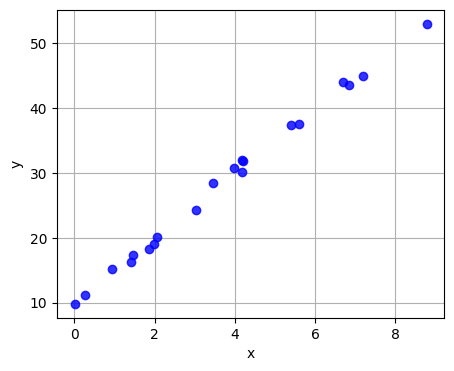

In [47]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

x = np.random.rand(20) * 10
y = func(x,a,b) + np.random.randn(20)

plt.figure(figsize=(5,4))
plt.plot(x, y, 'bo', label='Data', alpha=0.8)
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

## SciPy

Linear Regression

R-squared: 0.996130


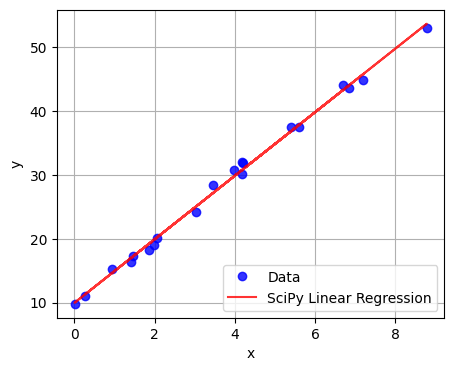

In [48]:
from scipy import stats
res = stats.linregress(x, y)

print(f"R-squared: {res.rvalue**2:.6f}")

plt.figure(figsize=(5,4))
plt.plot(x, y, 'bo', label='Data', alpha=0.8)
plt.plot(x, res.intercept + res.slope*x, 'r', label='SciPy Linear Regression', alpha=0.8)
plt.legend(loc='lower right')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()


Parameters

In [49]:
from scipy.stats import t

tinv = lambda p, df: abs(t.ppf(p/2, df))
ts = tinv(0.05, len(x)-2)

print(f"slope (95%): {res.slope:.2f} +/- {ts*res.stderr:.2f}")
print(f"intercept (95%): {res.intercept:.2f}"f" +/- {ts*res.intercept_stderr:.2f}")

print(f"slope error: {np.abs(a-res.slope)/a*100:.2f} %")
print(f"intercept error: {np.abs(b-res.intercept)/b*100:.2f} %")

slope (95%): 4.98 +/- 0.15
intercept (95%): 9.98 +/- 0.68
slope error: 0.48 %
intercept error: 0.19 %


## PyTorch

In [50]:
import torch
from torch import nn 
torch.manual_seed(1)


Define Linear Regression class using Neural Network module that contains a linear function

In [51]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(1, 1)

  def forward(self, x):
    pred = self.linear(x)
    return pred

Initial point

In [52]:
model = LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


Initial Parameters
slope : 0.52
intercept: -0.44


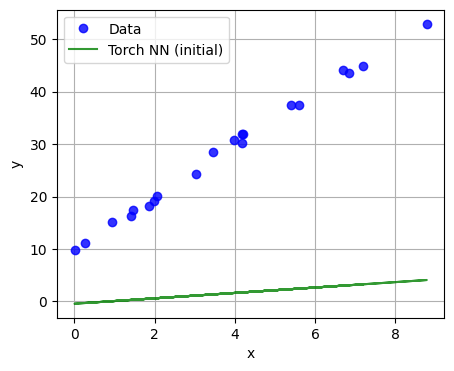

In [53]:
# Torch Tensor
xtt = torch.from_numpy(x.reshape(len(x),-1)).to(torch.float32)
ytt = torch.from_numpy(y.reshape(len(y),-1)).to(torch.float32)

# initial parameters
a_nn, b_nn = model.parameters()
a1, b1 = a_nn[0][0].item(), b_nn[0].item()

print("Initial Parameters")
print(f"slope : {a1:.2f}")
print(f"intercept: {b1:.2f}")

plt.figure(figsize=(5,4))
plt.plot(x, y, 'bo', label='Data', alpha=0.8)
plt.plot(x, model(xtt).detach().numpy(), 'g', label='Torch NN (initial)', alpha=0.8)
plt.legend(loc='best')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()


Training the model

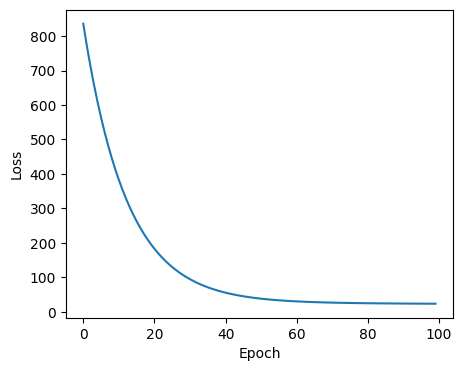

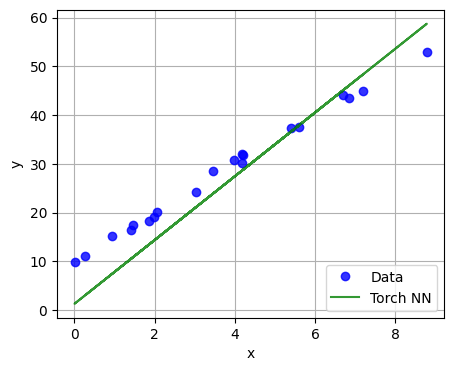

In [54]:
import torch.optim as optim
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)


epochs = 100
losses = []

for epocs in range(epochs):
  optimizer.zero_grad()

  y_pred = model(xtt)
  loss = criterion(y_pred, ytt)
  losses.append(loss.item())
  loss.backward()

  optimizer.step()

plt.figure(figsize=(5,4))
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.figure(figsize=(5,4))
plt.plot(x, y, 'bo', label='Data', alpha=0.8)
plt.plot(x, model(xtt).detach().numpy(), 'g', label='Torch NN', alpha=0.8)
plt.legend(loc='lower right')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

In [55]:
a2, b2 = a_nn[0][0].item(), b_nn[0].item()

print("Parameters")
print(f"slope : {a2:.2f}")
print(f"intercept: {b2:.2f}")

print(f"slope error: {np.abs(a-a2)/a*100:.2f} %")
print(f"intercept error: {np.abs(b-b2)/b*100:.2f} %")

Parameters
slope : 6.55
intercept: 1.26
slope error: 30.96 %
intercept error: 87.36 %


## Comparison

Sum of Squared Error

In [56]:
# Predictions at x
yfit1 = res.intercept + res.slope*x
yfit2 = model(xtt).detach().numpy()

sse1 = np.sum((y-yfit1)**2)
print('SSE_SciPy = ', sse1)

sse2 = np.sum((y-yfit2)**2)
print('SSE_TorchNN = ', sse2)


SSE_SciPy =  11.271667514133675
SSE_TorchNN =  162209.64651838224


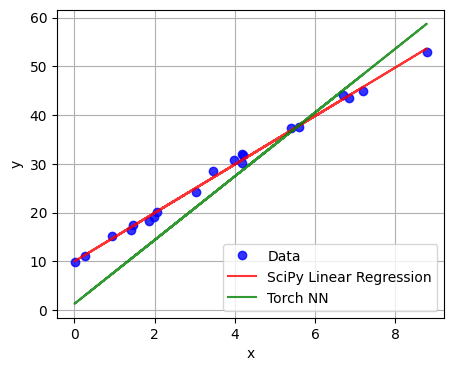

In [57]:
plt.figure(figsize=(5,4))
plt.plot(x, y, 'bo', label='Data', alpha=0.8)
plt.plot(x, yfit1, 'r', label='SciPy Linear Regression', alpha=0.8)
plt.plot(x, yfit2, 'g', label='Torch NN', alpha=0.8)
plt.legend(loc='lower right')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

## Discussion

The NN model was not able to accurately identify the parameters.
How to improve the accuracy of NN? Is the NN model too simple?